In [1]:
!pip install dash

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import streamlit as st
from scipy import stats  
from scipy.stats import chi2_contingency
import plotly.express as px
from dash import dcc, html
from dash.dependencies import Input, Output
import dash

In [3]:
activity = pd.read_csv('C:\\Users\\cesar\\portjulia\\activity.csv')
activity.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,patient,False,False,True,True,True,False
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,patient,False,False,False,False,True,False
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False


In [4]:
print(activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLINIC_ID               13941 non-null  int64 
 1   ACTIVITY_AT             13941 non-null  object
 2   ACTIVITY_TYPE           13941 non-null  object
 3   FEATURE                 13941 non-null  object
 4   MODULE                  13941 non-null  object
 5   ANALYTICS_DOMAIN        13941 non-null  object
 6   IS_TRANSACTION          13941 non-null  bool  
 7   IS_BNPL_ACTIVITY        13941 non-null  bool  
 8   IS_VALID_ACTIVITY       13941 non-null  bool  
 9   IS_DELETION_ACTIVITY    13941 non-null  bool  
 10  IS_MANAGEMENT_ACTIVITY  13941 non-null  bool  
 11  IS_FINANCE_ACTIVITY     13941 non-null  bool  
dtypes: bool(6), int64(1), object(5)
memory usage: 735.3+ KB
None


In [5]:
# Contar quantos CLINIC_ID iguais existem na tabela activity
clinic_id_counts = activity['CLINIC_ID'].value_counts()

# Exibir as contagens
print(clinic_id_counts)

CLINIC_ID
10449    697
9825     401
9691     342
10138    324
9572     272
        ... 
9171       1
9173       1
10343      1
9176       1
9146       1
Name: count, Length: 1070, dtype: int64


In [6]:
# Contar a quantidade de cada status desejado
status_activity = activity['ACTIVITY_TYPE'].value_counts()

# Exibir as linhas filtradas
print(status_activity)

# Contar a quantidade de cada status desejado
status_activity1 = activity['FEATURE'].value_counts()

# Exibir as linhas filtradas
print(status_activity1)

# Contar a quantidade de cada status desejado
status_activity2 = activity['MODULE'].value_counts()

# Exibir as linhas filtradas
print(status_activity2)

# Contar a quantidade de cada status desejado
status_activity3 = activity['ANALYTICS_DOMAIN'].value_counts()

# Exibir as linhas filtradas
print(status_activity3)

ACTIVITY_TYPE
patient_created                 3241
procedure_created               2516
pre_analysis                    2362
time_slot_created               2167
budget_created                   789
revenue_created                  466
anamnesis_created                407
expense_created                  271
time_slot_discarded              271
procedure_discarded              257
new_user_created                 238
observation_added                173
budget_discarded                 160
patient_discarded                144
folder_created                   120
request                           98
document_created                  77
basic_credit_check                38
prescription_created              35
anamnesis_template_created        28
time_slot_attendance_update       22
contract                          20
complete_credit_check             19
observation_discarded             10
anamnesis_template_discarded       9
payment_book_created               3
Name: count, dtype: int6

In [7]:
# Identificar linhas com valores nulos na tabela activity
print("Valores NaN na tabela activity:\n", activity.isnull().sum(), "\n")

Valores NaN na tabela activity:
 CLINIC_ID                 0
ACTIVITY_AT               0
ACTIVITY_TYPE             0
FEATURE                   0
MODULE                    0
ANALYTICS_DOMAIN          0
IS_TRANSACTION            0
IS_BNPL_ACTIVITY          0
IS_VALID_ACTIVITY         0
IS_DELETION_ACTIVITY      0
IS_MANAGEMENT_ACTIVITY    0
IS_FINANCE_ACTIVITY       0
dtype: int64 



In [8]:
clinics = pd.read_csv('C:\\Users\\cesar\\portjulia\\clinics.csv')

In [9]:
clinics.head()

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,...,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
0,8993,2023-08-01 06:25:16.121,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""patients_manag...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8995,2023-08-01 06:59:23.156,Independente,False,Inbound,"[""bnpl""]",Apenas BNPL,True,True,False,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8996,2023-08-01 08:03:38.557,Independente,False,Inbound,"[""calendar"", ""bnpl"", ""patients_management"", ""f...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8997,2023-08-01 08:34:33.894,Independente,False,Inbound,"[""patients_management""]",Apenas SaaS,False,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [10]:
print(clinics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   CLINIC_ID                                   2219 non-null   int64 
 1   CLINIC_CREATED_AT                           2219 non-null   object
 2   BUSINESS_SEGMENTATION                       2219 non-null   object
 3   IS_CHAIN_CLINIC                             2219 non-null   bool  
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object
 5   INTEREST_REASONS                            2066 non-null   object
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object
 7   HAS_INTEREST_BNPL                           2219 non-null   bool  
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool  
 9   HAS_INTEREST_SAAS                           2219 non-null   bool  
 10  TRIAL_DURATION          

In [11]:
# Contar a quantidade de cada status desejado
ctg_status = clinics['BUSINESS_SEGMENTATION'].value_counts()

# Exibir as linhas filtradas
print(ctg_status)

BUSINESS_SEGMENTATION
Independente             2055
Rede Homologada           143
Independente - Legado      21
Name: count, dtype: int64


In [12]:
# Contar a quantidade de cada status desejado
ctgem_status = clinics['IS_CHAIN_CLINIC'].value_counts()

# Exibir as linhas filtradas
print(ctgem_status)

IS_CHAIN_CLINIC
False    2076
True      143
Name: count, dtype: int64


In [13]:
# Contar a quantidade de cada status desejado
ctgm_status = clinics['HAS_INTEREST_BNPL_ONLY'].value_counts()

# Exibir as linhas filtradas
print(ctgm_status)

HAS_INTEREST_BNPL_ONLY
False    1341
True      878
Name: count, dtype: int64


In [14]:
print("Valores NaN na tabela clinics:\n", clinics.isnull().sum(), "\n")

Valores NaN na tabela clinics:
 CLINIC_ID                                        0
CLINIC_CREATED_AT                                0
BUSINESS_SEGMENTATION                            0
IS_CHAIN_CLINIC                                  0
FIRST_USER_HUBSPOT_SOURCE                        0
INTEREST_REASONS                               153
INTEREST_CATEGORY_SIGNUP                         0
HAS_INTEREST_BNPL                                0
HAS_INTEREST_BNPL_ONLY                           0
HAS_INTEREST_SAAS                                0
TRIAL_DURATION                                   0
TRIAL_START_DATE                                 0
TRIAL_END_DATE                                   0
TRIAL_START_HOUR                                 0
TRIAL_START_HOUR_CATEGORY                        0
TRIAL_START_DAY_OF_WEEK                          0
TRIAL_START_DAY_OF_WEEK_CATEGORY                 0
HAS_USER_CREATED                                 0
MARKETING_ATTRIBUITION                           0

In [15]:
#linhas_nulas_clinics = clinics[clinics.isnull().any(axis=1)]
#print("Tabela clinics - Linhas e Colunas com valores nulos:\n", linhas_nulas_clinics, "\n")

In [16]:
subscriptions = pd.read_csv('C:\\Users\\cesar\\portjulia\\subscriptions.csv')
subscriptions.head(10)

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,2023-09-01 17:14:51.000,2023-10-01 17:14:51.000,2023-09-01 17:16:49.000,2023-09-01 18:17:14.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.90,NaN,NaN,NaN,NaN
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,NaN,NaN
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,NaN,NaN
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,2023-08-03 12:12:14.000,2023-09-03 12:12:14.000,2023-08-03 12:12:14.000,2023-08-03 12:12:16.000,complete,canceled,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,NaN,NaN
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,2023-08-03 16:30:22.000,2023-09-03 16:30:22.000,2023-08-03 16:30:22.000,2023-08-03 16:30:24.000,complete,canceled,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,NaN,NaN
5,9031,sub_1NbTDjCpjOdJI4gTxs3GC5kl,2023-08-04,NaN,2023-10-04 15:59:31.000,2023-11-04 15:59:31.000,2023-10-04 16:07:36.000,2023-10-04 17:13:22.000,complete,active,1.0,Cartão de Crédito,visa,89.90,NaN,NaN,NaN,NaN
6,9195,sub_1NbXPdCpjOdJI4gTzI7Aud54,2023-08-04,2023-09-10,2023-09-04 20:28:05.000,2023-10-04 20:28:05.000,2023-09-04 20:31:59.000,2023-08-04 20:28:07.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.90,NaN,NaN,NaN,NaN
7,9025,sub_1NcJ0rCpjOdJI4gTXD7prTk5,2023-08-06,NaN,2023-08-06 23:17:41.000,2024-08-06 23:17:41.000,2023-08-06 23:17:41.000,2023-08-06 23:17:44.000,complete,active,12.0,Cartão de Crédito,mastercard,587.16,NaN,CAPIM30,oUu4Feil,NaN
8,9175,sub_1NcT3pCpjOdJI4gTvLlhApJX,2023-08-07,NaN,2023-08-07 10:01:25.000,2024-08-07 10:01:25.000,2023-08-07 10:01:25.000,2023-08-07 10:01:27.000,complete,active,12.0,Cartão de Crédito,mastercard,587.16,NaN,CAPIM30,oUu4Feil,NaN
9,9318,sub_1Ncps4CpjOdJI4gT2tdKW1ba,2023-08-08,2023-09-14,2023-09-08 10:22:48.000,2023-10-08 10:22:48.000,2023-09-08 10:23:57.000,2023-08-08 10:22:51.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.90,NaN,NaN,NaN,NaN


In [17]:
print(subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CLINIC_ID                               385 non-null    int64  
 1   STRIPE_SUBSCRIPTION_ID                  385 non-null    object 
 2   SUBSCRIPTION_START_DATE                 384 non-null    object 
 3   SUBSCRIPTION_END_DATE                   46 non-null     object 
 4   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    object 
 5   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    object 
 6   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    object 
 7   LAST_PAYMENT_AT                         371 non-null    object 
 8   CHECKOUT_STATUS                         383 non-null    object 
 9   SUBSCRIPTION_STATUS                     383 non-null    object 
 10  BILLING_INTERVAL_IN_MONTHS              384 non-null    float6

In [18]:
# Excluindo as colunas da tabela subscriptions
subscriptions = subscriptions.drop(columns=['FIRST_PAYMENT_AMOUNT_OFF', 'FIRST_PAYMENT_PROMOTION_CODE', 'FIRST_PAYMENT_COUPON_ID', 'FIRST_PAYMENT_AMOUNT_OFF_2'])

# Exibindo as primeiras linhas da tabela atualizada para conferir
subscriptions.head()


,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,2023-09-01 17:14:51.000,2023-10-01 17:14:51.000,2023-09-01 17:16:49.000,2023-09-01 18:17:14.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.9
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.9
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.9
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,2023-08-03 12:12:14.000,2023-09-03 12:12:14.000,2023-08-03 12:12:14.000,2023-08-03 12:12:16.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,2023-08-03 16:30:22.000,2023-09-03 16:30:22.000,2023-08-03 16:30:22.000,2023-08-03 16:30:24.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9


In [19]:
print(subscriptions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CLINIC_ID                               385 non-null    int64  
 1   STRIPE_SUBSCRIPTION_ID                  385 non-null    object 
 2   SUBSCRIPTION_START_DATE                 384 non-null    object 
 3   SUBSCRIPTION_END_DATE                   46 non-null     object 
 4   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    object 
 5   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    object 
 6   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    object 
 7   LAST_PAYMENT_AT                         371 non-null    object 
 8   CHECKOUT_STATUS                         383 non-null    object 
 9   SUBSCRIPTION_STATUS                     383 non-null    object 
 10  BILLING_INTERVAL_IN_MONTHS              384 non-null    float6

In [20]:
nan_subscriptions = subscriptions[subscriptions.isnull().any(axis=1)]
nan_subscriptions.head(3)

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.9
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.9
5,9031,sub_1NbTDjCpjOdJI4gTxs3GC5kl,2023-08-04,NaN,2023-10-04 15:59:31.000,2023-11-04 15:59:31.000,2023-10-04 16:07:36.000,2023-10-04 17:13:22.000,complete,active,1.0,Cartão de Crédito,visa,89.9


In [21]:
# Verificar as linhas onde a coluna 'SUBSCRIPTION_END_DATE' contém valores nulos
#nan_subscription_end_date = subscriptions[(subscriptions['SUBSCRIPTION_END_DATE'].isnull()) & (subscriptions['SUBSCRIPTION_STATUS'] == 'active')]

# Contar a quantidade de cada status desejado
#contagem_status = nan_subscription_end_date['SUBSCRIPTION_STATUS'].value_counts()

# Exibir as linhas filtradas
#print(contagem_status)

In [22]:
#transformando o tipo da coluna
subscriptions['SUBSCRIPTION_START_DATE'] = pd.to_datetime(subscriptions['SUBSCRIPTION_START_DATE'])
clinics['CLINIC_CREATED_AT'] = pd.to_datetime(clinics['CLINIC_CREATED_AT'])

In [23]:
# Unir clinics e subscriptions pelo CLINIC_ID
clinics_subscriptions = pd.merge(clinics, subscriptions, on='CLINIC_ID', how='left')

# Excluir clínicas da Rede Homologada e franquias
clinics_filtered = clinics_subscriptions[(clinics_subscriptions['BUSINESS_SEGMENTATION'] != 'Rede Homologada') & 
                                         (clinics_subscriptions['IS_CHAIN_CLINIC'] != True)].copy()
# Definir as clínicas convertidas (aquelas que têm um SUBSCRIPTION_START_DATE)
clinics_filtered.loc[:, 'CONVERTED'] = ~clinics_filtered['SUBSCRIPTION_START_DATE'].isnull()

# Número de clínicas que converteram e total de clínicas em trial
total_clinics = clinics_filtered.shape[0]
converted_clinics = clinics_filtered['CONVERTED'].sum()

# Taxa de conversão
conversion_rate = converted_clinics / total_clinics
print(f'Taxa de Conversão: {conversion_rate:.2%}')

# Analisar a relação entre conversão e o tempo de trial
clinics_filtered.loc[:, 'DAYS_TO_CONVERT'] = (clinics_filtered[clinics_filtered['CONVERTED']]['SUBSCRIPTION_START_DATE'] - 
                                               clinics_filtered[clinics_filtered['CONVERTED']]['CLINIC_CREATED_AT']).dt.days

Taxa de Conversão: 18.38%


In [24]:
print(f'Total de Clínicas: {total_clinics}')
print(f'Clinicas que Converteram: {converted_clinics}')
# Número de clínicas que não converteram
non_converted_clinics = total_clinics - converted_clinics

# Imprimir o valor das clínicas que não converteram
print(f'Clínicas que não converteram: {non_converted_clinics}')

Total de Clínicas: 2078
Clinicas que Converteram: 382
Clínicas que não converteram: 1696


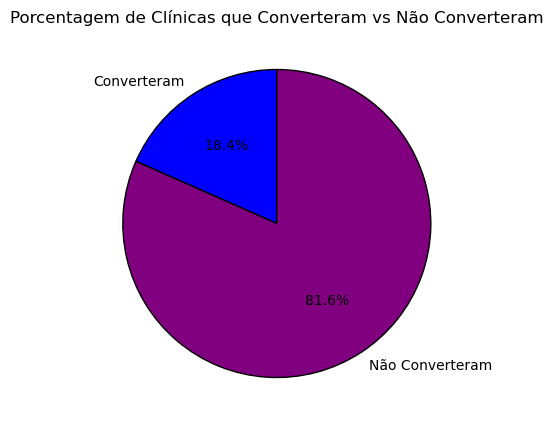

In [25]:
# Dados
converted_percentage = (converted_clinics / total_clinics) * 100
non_converted_percentage = 100 - converted_percentage
labels = ['Converteram', 'Não Converteram']
sizes = [converted_percentage, non_converted_percentage]
colors = ['blue', 'purple']

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})

# Adicionar título
plt.title('Porcentagem de Clínicas que Converteram vs Não Converteram')

# Mostrar o gráfico
plt.show()

In [26]:
# Unir a tabela filtered com a tabela activity
clinics_activity = pd.merge(clinics_filtered, activity, on='CLINIC_ID', how='left')

# Para as clínicas que converteram
clinics_converted = clinics_activity[clinics_activity['CONVERTED']].copy()

# Selecionar colunas de interesse para clínicas convertidas, incluindo informações da tabela activity
clinics_converted_ass = clinics_converted[['CLINIC_ID', 'SUBSCRIPTION_START_DATE', 'CLINIC_CREATED_AT', 'DAYS_TO_CONVERT', 'INTEREST_CATEGORY_SIGNUP',
                                            'ACTIVITY_AT', 'ACTIVITY_TYPE', 'FEATURE', 'MODULE','ANALYTICS_DOMAIN', 'IS_TRANSACTION', 
                                            'IS_BNPL_ACTIVITY', 'IS_VALID_ACTIVITY', 'IS_DELETION_ACTIVITY', 'IS_MANAGEMENT_ACTIVITY', 
                                            'IS_FINANCE_ACTIVITY' ]]
clinics_converted_ass.head(10)

,CLINIC_ID,SUBSCRIPTION_START_DATE,CLINIC_CREATED_AT,DAYS_TO_CONVERT,INTEREST_CATEGORY_SIGNUP,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
37,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 09:59:54.468,patient_created,patient_management,patient,patient,False,False,False,False,True,False
38,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:00:32.404,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
39,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:03:01.540,procedure_created,medical_record,patient,patient,False,False,True,False,True,False
40,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:03:01.540,procedure_created,medical_record,patient,patient,False,False,True,False,True,False
41,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:05:48.729,new_user_created,user_management,setup,setup,False,False,True,False,True,False
42,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:06:29.088,procedure_discarded,medical_record,patient,patient,False,False,True,True,True,False
43,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:07:10.747,budget_created,budget_management,patient,patient,False,False,True,False,True,False
44,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:08:40.174,anamnesis_created,anamnese,patient,patient,False,False,True,False,True,False
45,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:14:39.749,folder_created,documents_and_files,patient,patient,False,False,True,False,True,False
46,9000,2023-08-01,2023-08-01 09:58:01.877,-1.0,BNPL e SaaS,2023-08-01 10:16:16.594,revenue_created,revenue_management,finance,finance,False,False,True,False,True,False


In [27]:
# Para as clínicas que não converteram
clinics_not_converted = clinics_activity[~clinics_activity['CONVERTED']].copy()

# Selecionar colunas de interesse para clínicas não convertidas, incluindo informações da tabela activity
clinics_not_converted_info = clinics_not_converted[['CLINIC_ID', 'SUBSCRIPTION_START_DATE', 'CLINIC_CREATED_AT', 'DAYS_TO_CONVERT', 'INTEREST_CATEGORY_SIGNUP', 
                                            'ACTIVITY_AT', 'ACTIVITY_TYPE', 'FEATURE', 'MODULE','ANALYTICS_DOMAIN', 'IS_TRANSACTION', 
                                            'IS_BNPL_ACTIVITY', 'IS_VALID_ACTIVITY', 'IS_DELETION_ACTIVITY', 'IS_MANAGEMENT_ACTIVITY', 
                                            'IS_FINANCE_ACTIVITY']]
clinics_not_converted.head()

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,...,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,8993,2023-08-01 06:25:16.121,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""patients_manag...",BNPL e SaaS,True,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,procedure_created,medical_record,patient,patient,False,False,True,False,True,False
4,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,procedure_created,medical_record,patient,patient,False,False,True,False,True,False


In [28]:
clinics_not_converted_info.head()

,CLINIC_ID,SUBSCRIPTION_START_DATE,CLINIC_CREATED_AT,DAYS_TO_CONVERT,INTEREST_CATEGORY_SIGNUP,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,8993,NaT,2023-08-01 06:25:16.121,NaN,BNPL e SaaS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8994,NaT,2023-08-01 06:58:36.251,NaN,BNPL e SaaS,2023-08-01 11:11:58.521,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,8994,NaT,2023-08-01 06:58:36.251,NaN,BNPL e SaaS,2023-08-01 11:12:53.451,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,8994,NaT,2023-08-01 06:58:36.251,NaN,BNPL e SaaS,2023-08-01 11:15:08.884,procedure_created,medical_record,patient,patient,False,False,True,False,True,False
4,8994,NaT,2023-08-01 06:58:36.251,NaN,BNPL e SaaS,2023-08-01 11:15:30.367,procedure_created,medical_record,patient,patient,False,False,True,False,True,False


In [29]:
# Estatísticas descritivas para clínicas que converteram
clinics_converted_ass.describe()

# Contagem de valores únicos nas colunas categóricas
clinics_converted_ass['ACTIVITY_TYPE'].value_counts()

ACTIVITY_TYPE
patient_created                 2205
procedure_created               1617
time_slot_created               1198
pre_analysis                     650
budget_created                   425
revenue_created                  205
procedure_discarded              185
anamnesis_created                175
time_slot_discarded              167
new_user_created                 126
observation_added                123
expense_created                  119
budget_discarded                  97
patient_discarded                 90
folder_created                    37
basic_credit_check                29
request                           29
document_created                  26
complete_credit_check             13
time_slot_attendance_update       12
anamnesis_template_created        10
prescription_created               8
contract                           6
anamnesis_template_discarded       4
observation_discarded              3
payment_book_created               3
Name: count, dtype: int6

In [30]:
# Estatísticas descritivas para clínicas que não converteram
clinics_not_converted.describe()

# Contagem de valores únicos nas colunas categóricas
clinics_not_converted['SUBSCRIPTION_START_DATE'].value_counts()

Series([], Name: count, dtype: int64)

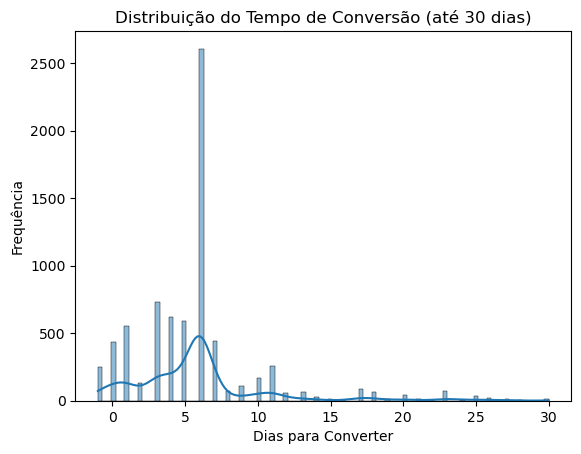

In [31]:
# Filtrando os dados para mostrar apenas conversões em até 30 dias
filtered_data = clinics_converted_ass[clinics_converted_ass['DAYS_TO_CONVERT'] <= 30]

# Distribuição do tempo de conversão
sns.histplot(filtered_data['DAYS_TO_CONVERT'], kde=True)
plt.title('Distribuição do Tempo de Conversão (até 30 dias)')
plt.xlabel('Dias para Converter')
plt.ylabel('Frequência')
plt.show()

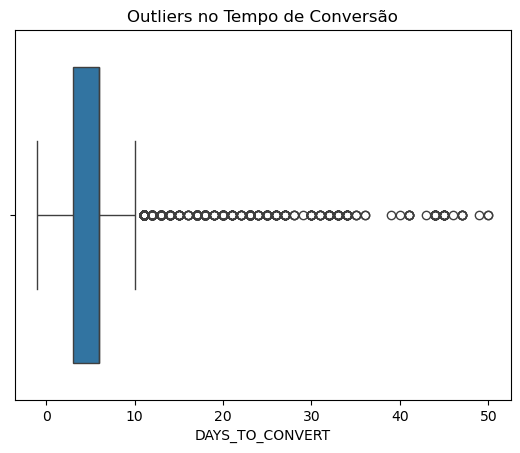

In [32]:
# Boxplot para identificar outliers no tempo de conversão
filtered_data = clinics_converted_ass[clinics_converted_ass['DAYS_TO_CONVERT'] <= 50]
sns.boxplot(x=filtered_data['DAYS_TO_CONVERT'])
plt.title('Outliers no Tempo de Conversão')
plt.show()

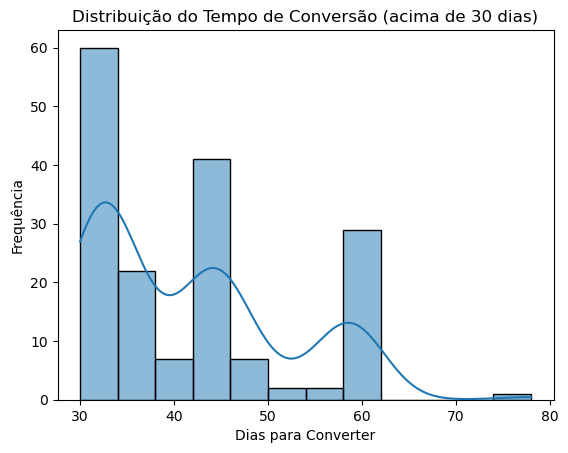

In [33]:
# Filtrando os dados para mostrar apenas conversões acima de 30 dias
filtered_data = clinics_converted_ass[clinics_converted_ass['DAYS_TO_CONVERT'] >= 30]

# Distribuição do tempo de conversão
sns.histplot(filtered_data['DAYS_TO_CONVERT'], kde=True)
plt.title('Distribuição do Tempo de Conversão (acima de 30 dias)')
plt.xlabel('Dias para Converter')
plt.ylabel('Frequência')
plt.show()

Atividades mais comuns em clínicas convertidas:
ACTIVITY_TYPE
patient_created      2205
procedure_created    1617
time_slot_created    1198
pre_analysis          650
budget_created        425
Name: count, dtype: int64
Atividades mais comuns em clínicas não convertidas:
ACTIVITY_TYPE
patient_created      1034
time_slot_created     968
procedure_created     899
budget_created        364
pre_analysis          292
Name: count, dtype: int64


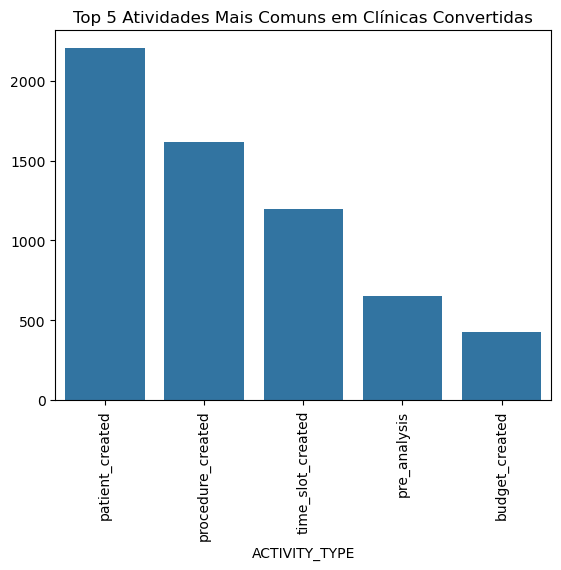

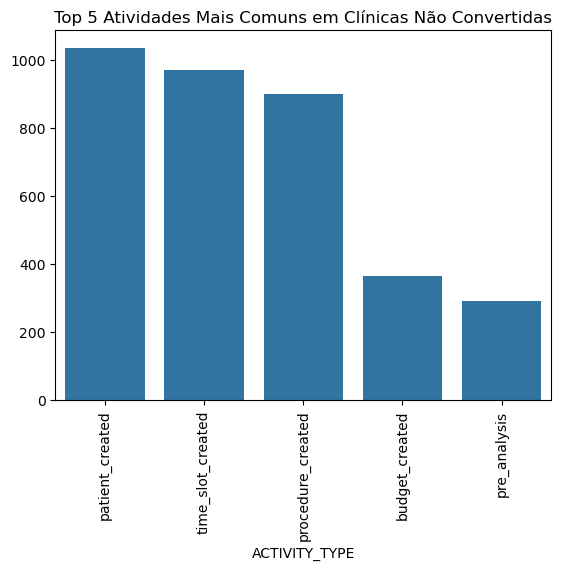

In [34]:
# Atividades mais comuns entre as clínicas convertidas (Top 5)
converted_activities = clinics_converted_ass['ACTIVITY_TYPE'].value_counts().head(5)
print('Atividades mais comuns em clínicas convertidas:')
print(converted_activities)

# Atividades mais comuns entre as clínicas não convertidas (Top 5)
non_converted_activities = clinics_not_converted['ACTIVITY_TYPE'].value_counts().head(5)
print('Atividades mais comuns em clínicas não convertidas:')
print(non_converted_activities)

# Plotar gráficos de barra para comparação (clínicas convertidas)
sns.barplot(x=converted_activities.index, y=converted_activities.values)
plt.title('Top 5 Atividades Mais Comuns em Clínicas Convertidas')
plt.xticks(rotation=90)
plt.show()

# Plotar gráfico de barra para clínicas não convertidas
sns.barplot(x=non_converted_activities.index, y=non_converted_activities.values)
plt.title('Top 5 Atividades Mais Comuns em Clínicas Não Convertidas')
plt.xticks(rotation=90)
plt.show()

Atividades mais comuns em clínicas convertidas:
ANALYTICS_DOMAIN
patient       5005
scheduling    1377
bnpl           685
Name: count, dtype: int64
Atividades mais comuns em clínicas não convertidas:
ANALYTICS_DOMAIN
patient       2959
scheduling    1082
finance        428
Name: count, dtype: int64


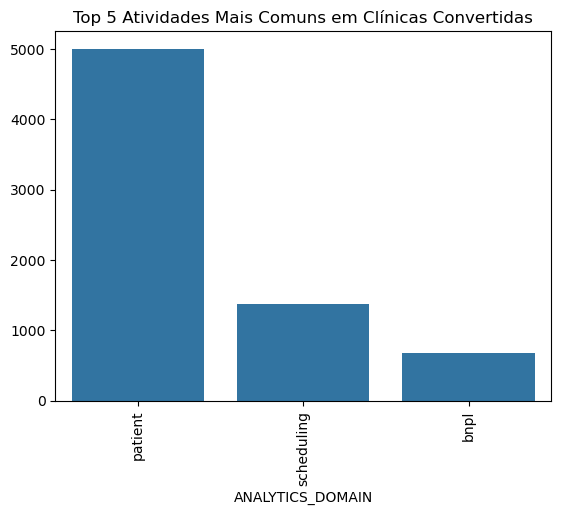

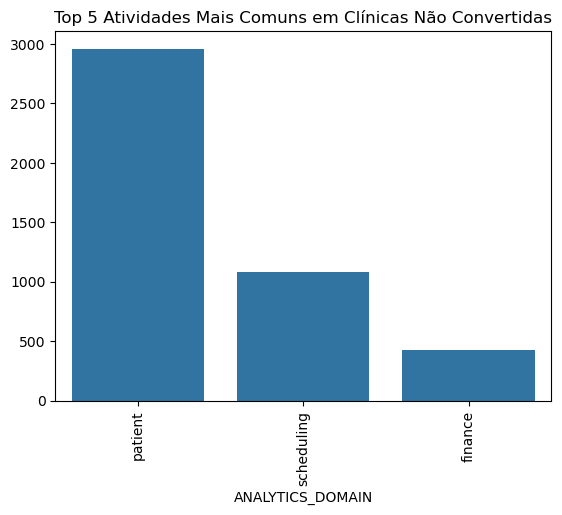

In [35]:
# Atividades mais comuns entre as clínicas convertidas (Top 3)
converted_ad = clinics_converted_ass['ANALYTICS_DOMAIN'].value_counts().head(3)
print('Atividades mais comuns em clínicas convertidas:')
print(converted_ad)

# Atividades mais comuns entre as clínicas não convertidas (Top 3)
non_converted_ad = clinics_not_converted['ANALYTICS_DOMAIN'].value_counts().head(3)
print('Atividades mais comuns em clínicas não convertidas:')
print(non_converted_ad)

# Plotar gráficos de barra para comparação (clínicas convertidas)
sns.barplot(x=converted_ad.index, y=converted_ad.values)
plt.title('Top 5 Atividades Mais Comuns em Clínicas Convertidas')
plt.xticks(rotation=90)
plt.show()

# Plotar gráfico de barra para clínicas não convertidas
sns.barplot(x=non_converted_ad.index, y=non_converted_ad.values)
plt.title('Top 5 Atividades Mais Comuns em Clínicas Não Convertidas')
plt.xticks(rotation=90)
plt.show()

Atividades mais comuns em clínicas convertidas:
INTEREST_CATEGORY_SIGNUP
BNPL e SaaS    4508
Apenas SaaS    1631
Apenas BNPL    1535
Name: count, dtype: int64
Atividades mais comuns em clínicas não convertidas:
INTEREST_CATEGORY_SIGNUP
BNPL e SaaS     2691
Apenas SaaS     1928
Apenas BNPL     1081
Desconhecido     142
Name: count, dtype: int64


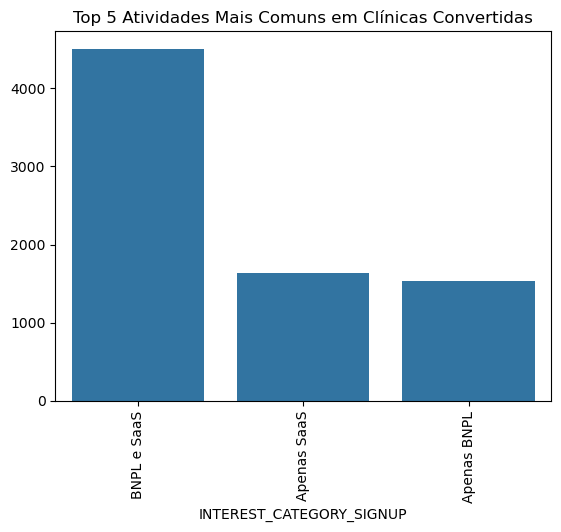

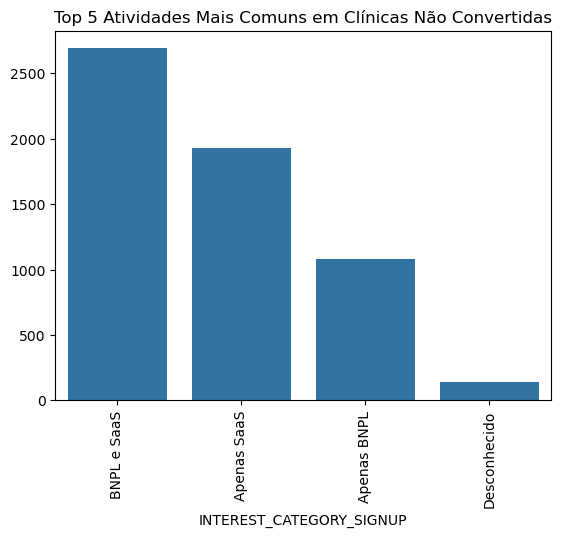

In [36]:
# Atividades mais comuns entre as clínicas convertidas
converted_ics = clinics_converted_ass['INTEREST_CATEGORY_SIGNUP'].value_counts().head()
print('Atividades mais comuns em clínicas convertidas:')
print(converted_ics)

# Atividades mais comuns entre as clínicas não convertidas
non_converted_ics = clinics_not_converted['INTEREST_CATEGORY_SIGNUP'].value_counts().head()
print('Atividades mais comuns em clínicas não convertidas:')
print(non_converted_ics)

# Plotar gráficos de barra para comparação (clínicas convertidas)
sns.barplot(x=converted_ics.index, y=converted_ics.values)
plt.title('Top 5 Atividades Mais Comuns em Clínicas Convertidas')
plt.xticks(rotation=90)
plt.show()

# Plotar gráfico de barra para clínicas não convertidas
sns.barplot(x=non_converted_ics.index, y=non_converted_ics.values)
plt.title('Top 5 Atividades Mais Comuns em Clínicas Não Convertidas')
plt.xticks(rotation=90)
plt.show()

In [37]:
print(clinics_activity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 59 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   13516 non-null  int64         
 1   CLINIC_CREATED_AT                           13516 non-null  datetime64[ns]
 2   BUSINESS_SEGMENTATION                       13516 non-null  object        
 3   IS_CHAIN_CLINIC                             13516 non-null  bool          
 4   FIRST_USER_HUBSPOT_SOURCE                   13516 non-null  object        
 5   INTEREST_REASONS                            13375 non-null  object        
 6   INTEREST_CATEGORY_SIGNUP                    13516 non-null  object        
 7   HAS_INTEREST_BNPL                           13516 non-null  bool          
 8   HAS_INTEREST_BNPL_ONLY                      13516 non-null  bool          
 9   HAS_IN

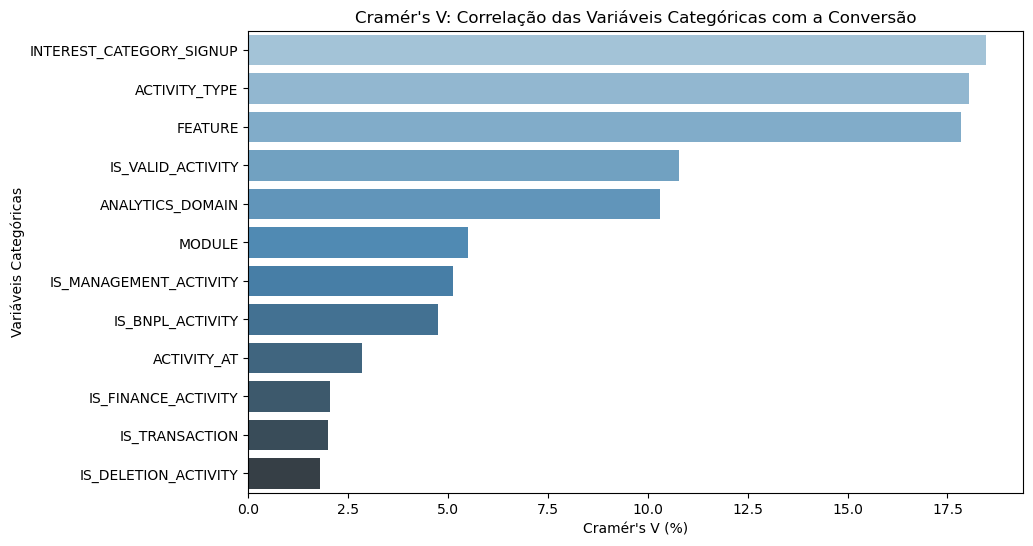

In [38]:
# 1. Adicionando uma coluna que indica conversão (1 para convertido, 0 para não convertido)
clinics_activity['CONVERTED'] = clinics_activity['CLINIC_ID'].apply(lambda x: 1 if x in clinics_converted_ass['CLINIC_ID'].values else 0)

# Função para calcular Cramér's V (correlação para variáveis categóricas)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k - 1) * (r - 1) / (n - 1))
    rcorr = r - (r - 1)**2 / (n - 1)
    kcorr = k - (k - 1)**2 / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    
# Filtrando as colunas relevantes
relevant_columns = [
    'DAYS_TO_CONVERT',
    'INTEREST_CATEGORY_SIGNUP',
    'ACTIVITY_AT',
    'ACTIVITY_TYPE',
    'FEATURE',
    'MODULE',
    'ANALYTICS_DOMAIN',
    'IS_TRANSACTION',
    'IS_BNPL_ACTIVITY',
    'IS_VALID_ACTIVITY',
    'IS_DELETION_ACTIVITY',
    'IS_MANAGEMENT_ACTIVITY',
    'IS_FINANCE_ACTIVITY',
    'CONVERTED'
]

# Filtrando os dados para as colunas relevantes
filtered_cols = clinics_activity[relevant_columns]

# Cálculo de Cramér's V para variáveis categóricas
categorical_columns = [
    'INTEREST_CATEGORY_SIGNUP',
    'ACTIVITY_AT',
    'ACTIVITY_TYPE',
    'FEATURE',
    'MODULE',
    'ANALYTICS_DOMAIN',
    'IS_TRANSACTION',
    'IS_BNPL_ACTIVITY',
    'IS_VALID_ACTIVITY',
    'IS_DELETION_ACTIVITY',
    'IS_MANAGEMENT_ACTIVITY',
    'IS_FINANCE_ACTIVITY'
]

correlation_results = []

# Calculando Cramér's V para cada coluna categórica em relação a CONVERTED
for column in categorical_columns:
    cramers_v_value = cramers_v(filtered_cols[column], filtered_cols['CONVERTED'])
    # Convertendo Cramér's V para porcentagem
    cramers_v_percentage = cramers_v_value * 100
    correlation_results.append((column, cramers_v_percentage))

# Criando um DataFrame para armazenar os resultados de Cramér's V
cramers_v_df = pd.DataFrame(correlation_results, columns=['Column', "Cramér's V (%)"])
cramers_v_df = cramers_v_df.sort_values(by="Cramér's V (%)", ascending=False)

# Visualizando a correlação das variáveis categóricas com a conversão
plt.figure(figsize=(10, 6))
sns.barplot(x="Cramér's V (%)", y="Column", data=cramers_v_df, hue="Column", palette="Blues_d", legend=False)
plt.title("Cramér's V: Correlação das Variáveis Categóricas com a Conversão")
plt.xlabel("Cramér's V (%)")
plt.ylabel("Variáveis Categóricas")
plt.show()

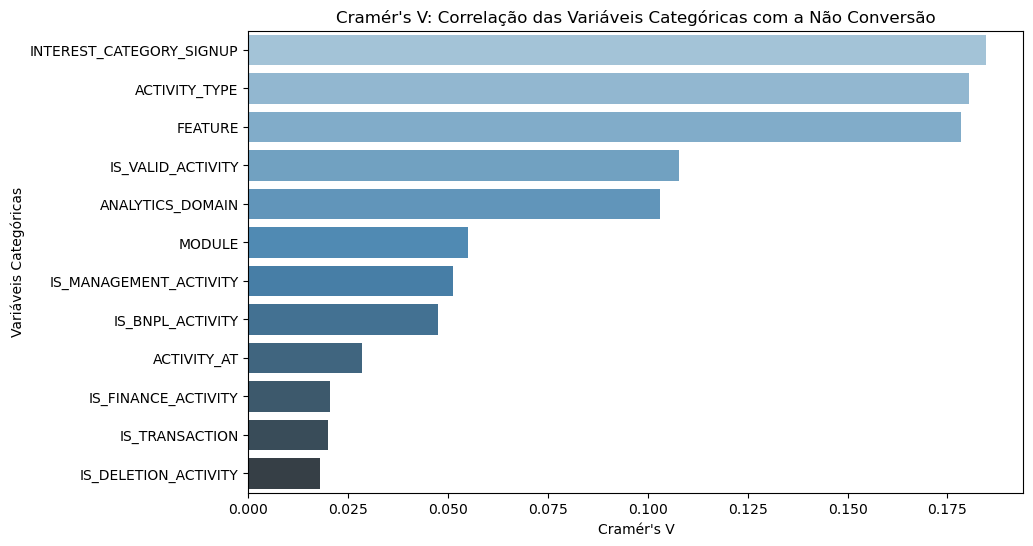

In [39]:
# Adicionando uma coluna que indica conversão (0 para não convertido)
clinics_activity['CONVERTED'] = clinics_activity['CLINIC_ID'].apply(lambda x: 0 if x in clinics_not_converted['CLINIC_ID'].values else 1)

# Função para calcular Cramér's V (correlação para variáveis categóricas)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - (k - 1) * (r - 1) / (n - 1))
    rcorr = r - (r - 1)**2 / (n - 1)
    kcorr = k - (k - 1)**2 / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Filtrando as colunas relevantes
relevant_columns = [
    'DAYS_TO_CONVERT',
    'INTEREST_CATEGORY_SIGNUP',
    'ACTIVITY_AT',
    'ACTIVITY_TYPE',
    'FEATURE',
    'MODULE',
    'ANALYTICS_DOMAIN',
    'IS_TRANSACTION',
    'IS_BNPL_ACTIVITY',
    'IS_VALID_ACTIVITY',
    'IS_DELETION_ACTIVITY',
    'IS_MANAGEMENT_ACTIVITY',
    'IS_FINANCE_ACTIVITY',
    'CONVERTED'
]

# Filtrando os dados para as colunas relevantes
filtered_cols = clinics_activity[relevant_columns]

# 1. Cálculo de Cramér's V para variáveis categóricas em relação a não conversão
categorical_columns = [
    'INTEREST_CATEGORY_SIGNUP',
    'ACTIVITY_AT',
    'ACTIVITY_TYPE',
    'FEATURE',
    'MODULE',
    'ANALYTICS_DOMAIN',
    'IS_TRANSACTION',
    'IS_BNPL_ACTIVITY',
    'IS_VALID_ACTIVITY',
    'IS_DELETION_ACTIVITY',
    'IS_MANAGEMENT_ACTIVITY',
    'IS_FINANCE_ACTIVITY'
]

correlation_results = []

# Calculando Cramér's V para cada coluna categórica em relação à não conversão (CONVERTED = 0)
for column in categorical_columns:
    cramers_v_value = cramers_v(filtered_cols[column], filtered_cols['CONVERTED'])
    correlation_results.append((column, cramers_v_value))

# Criando um DataFrame para armazenar os resultados de Cramér's V
cramers_v_df = pd.DataFrame(correlation_results, columns=['Column', "Cramér's V"])
cramers_v_df = cramers_v_df.sort_values(by="Cramér's V", ascending=False)

# Visualizando a correlação das variáveis categóricas com a não conversão
plt.figure(figsize=(10, 6))
sns.barplot(x="Cramér's V", y="Column", data=cramers_v_df, hue="Column", palette="Blues_d", legend=False)
plt.title("Cramér's V: Correlação das Variáveis Categóricas com a Não Conversão")
plt.xlabel("Cramér's V")
plt.ylabel("Variáveis Categóricas")
plt.show()

Distribuição de INTEREST_CATEGORY_SIGNUP - Clínicas Convertidas:
INTEREST_CATEGORY_SIGNUP
BNPL e SaaS    0.587438
Apenas SaaS    0.212536
Apenas BNPL    0.200026
Name: proportion, dtype: float64

Distribuição de INTEREST_CATEGORY_SIGNUP - Clínicas Não Convertidas:
INTEREST_CATEGORY_SIGNUP
BNPL e SaaS     0.460630
Apenas SaaS     0.330024
Apenas BNPL     0.185039
Desconhecido    0.024307
Name: proportion, dtype: float64


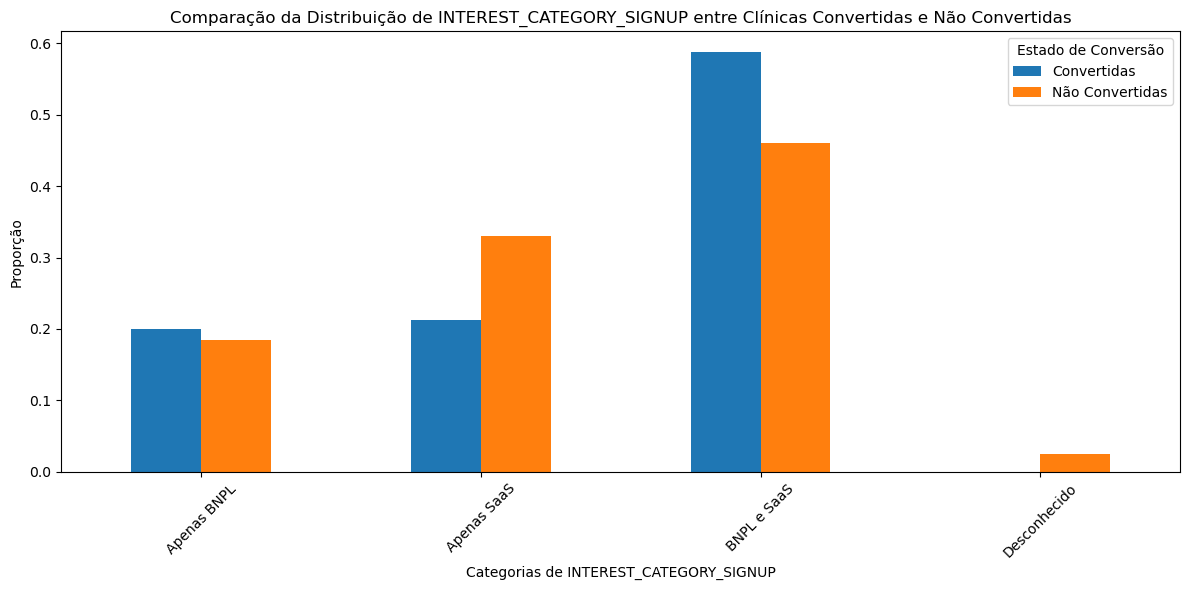

In [40]:
#Separando os dados em dois grupos: convertidos e não convertidos
converted_clinics = clinics_activity[clinics_activity['CONVERTED'] == 1]
not_converted_clinics = clinics_activity[clinics_activity['CONVERTED'] == 0]

# Análise descritiva - Distribuição das categorias na coluna 'INTEREST_CATEGORY_SIGNUP'
converted_interest_dist = converted_clinics['INTEREST_CATEGORY_SIGNUP'].value_counts(normalize=True)
not_converted_interest_dist = not_converted_clinics['INTEREST_CATEGORY_SIGNUP'].value_counts(normalize=True)

# Exibindo a distribuição de categorias
print("Distribuição de INTEREST_CATEGORY_SIGNUP - Clínicas Convertidas:")
print(converted_interest_dist)
print("\nDistribuição de INTEREST_CATEGORY_SIGNUP - Clínicas Não Convertidas:")
print(not_converted_interest_dist)

# Visualização comparativa
interest_comparison = pd.DataFrame({
    'Convertidas': converted_interest_dist,
    'Não Convertidas': not_converted_interest_dist
}).fillna(0)

# Plotando a comparação
interest_comparison.plot(kind='bar', figsize=(12, 6))
plt.title("Comparação da Distribuição de INTEREST_CATEGORY_SIGNUP entre Clínicas Convertidas e Não Convertidas")
plt.xlabel("Categorias de INTEREST_CATEGORY_SIGNUP")
plt.ylabel("Proporção")
plt.xticks(rotation=45)
plt.legend(title="Estado de Conversão")
plt.tight_layout()
plt.show()

Distribuição de INTEREST_CATEGORY_SIGNUP - Clínicas Convertidas:
INTEREST_CATEGORY_SIGNUP
BNPL e SaaS    0.587438
Apenas SaaS    0.212536
Apenas BNPL    0.200026
Name: proportion, dtype: float64

Distribuição de INTEREST_CATEGORY_SIGNUP - Clínicas Não Convertidas:
INTEREST_CATEGORY_SIGNUP
BNPL e SaaS     0.460630
Apenas SaaS     0.330024
Apenas BNPL     0.185039
Desconhecido    0.024307
Name: proportion, dtype: float64


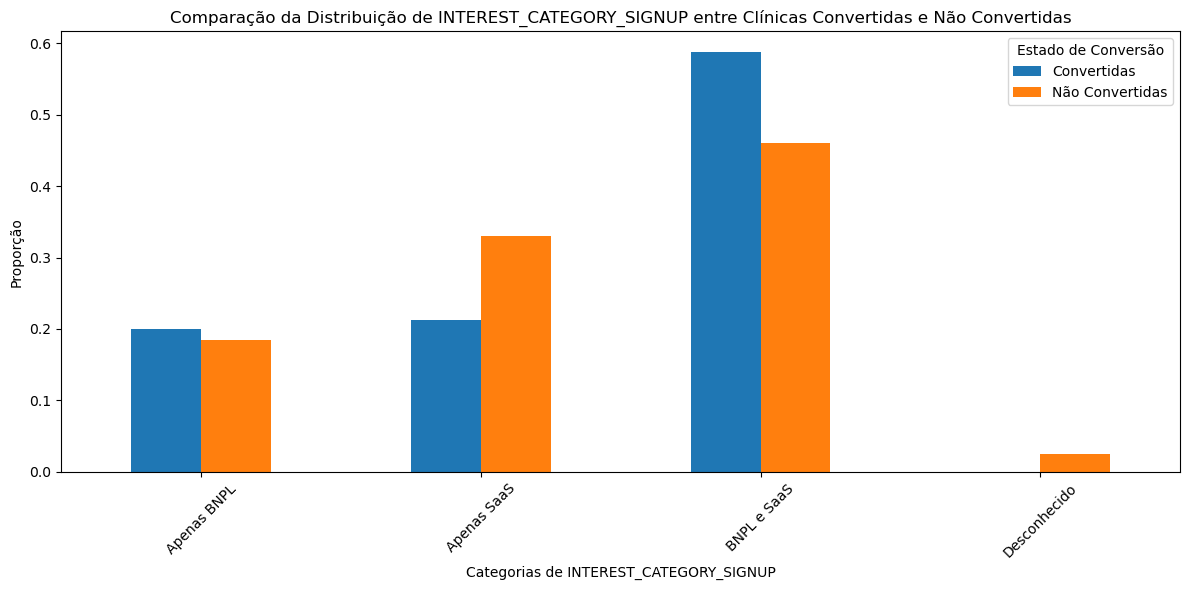

Distribuição de ACTIVITY_TYPE - Clínicas Convertidas:
ACTIVITY_TYPE
patient_created                 0.291590
procedure_created               0.213832
time_slot_created               0.158424
pre_analysis                    0.085956
budget_created                  0.056202
revenue_created                 0.027109
procedure_discarded             0.024464
anamnesis_created               0.023142
time_slot_discarded             0.022084
new_user_created                0.016662
observation_added               0.016266
expense_created                 0.015737
budget_discarded                0.012827
patient_discarded               0.011902
folder_created                  0.004893
basic_credit_check              0.003835
request                         0.003835
document_created                0.003438
complete_credit_check           0.001719
time_slot_attendance_update     0.001587
anamnesis_template_created      0.001322
prescription_created            0.001058
contract                      

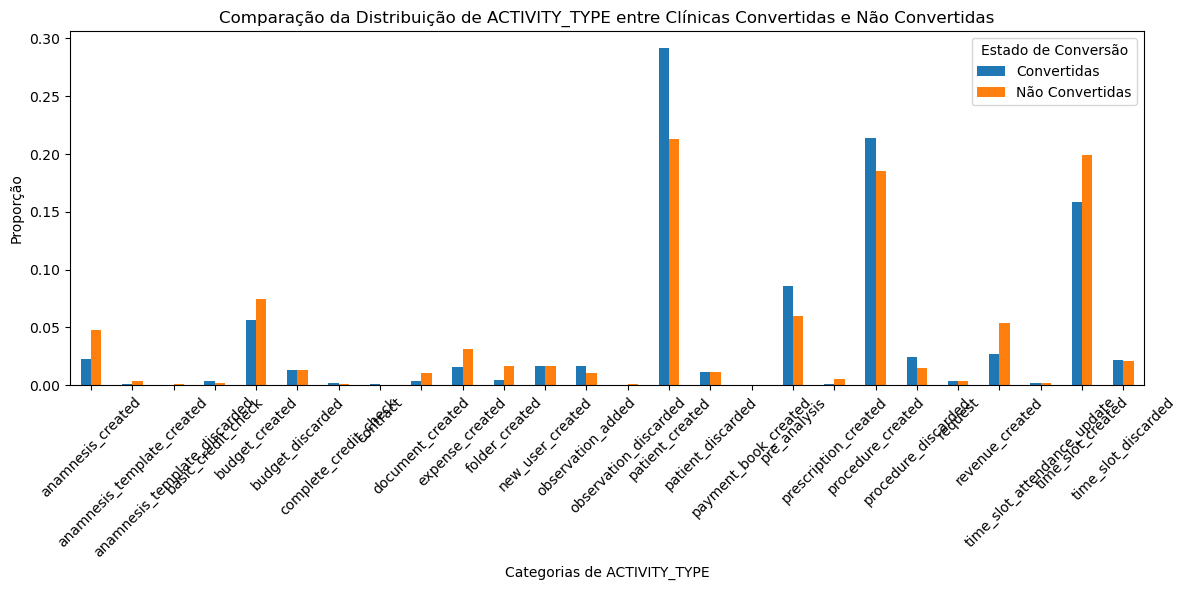

Distribuição de FEATURE - Clínicas Convertidas:
FEATURE
patient_management     0.320153
medical_record         0.238297
scheduling             0.182095
bnpl                   0.090585
budget_management      0.069029
revenue_management     0.042846
anamnese               0.024993
user_management        0.016662
documents_and_files    0.009389
credit_check           0.005554
payment_book           0.000397
Name: proportion, dtype: float64

Distribuição de FEATURE - Clínicas Não Convertidas:
FEATURE
patient_management     0.235645
scheduling             0.222680
medical_record         0.199835
budget_management      0.087878
revenue_management     0.084997
bnpl                   0.063593
anamnese               0.052480
documents_and_files    0.033134
user_management        0.016670
credit_check           0.003087
Name: proportion, dtype: float64


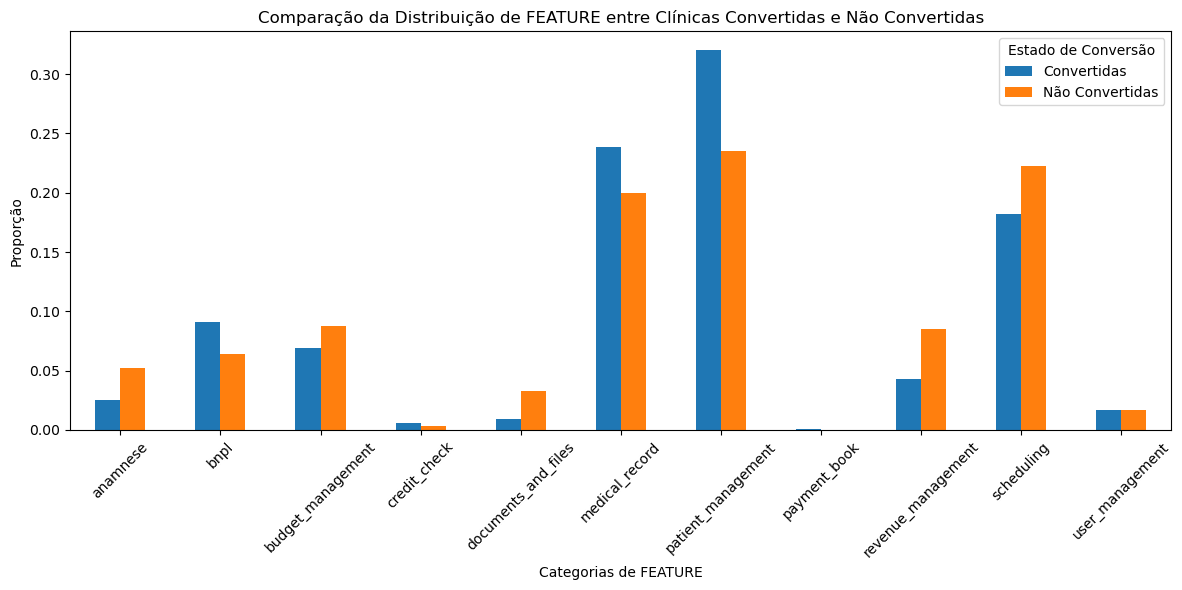

Distribuição de MODULE - Clínicas Convertidas:
MODULE
patient     0.661862
schedule    0.182095
finance     0.139381
setup       0.016662
Name: proportion, dtype: float64

Distribuição de MODULE - Clínicas Não Convertidas:
MODULE
patient     0.608973
schedule    0.222680
finance     0.151677
setup       0.016670
Name: proportion, dtype: float64


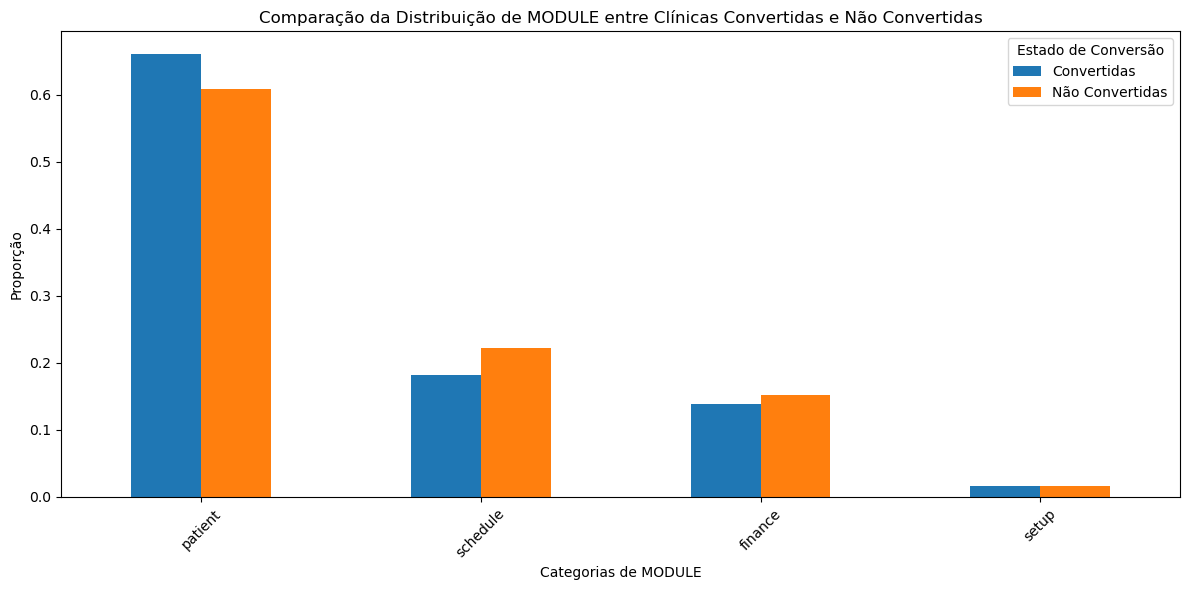

Distribuição de ANALYTICS_DOMAIN - Clínicas Convertidas:
ANALYTICS_DOMAIN
patient       0.661862
scheduling    0.182095
bnpl          0.090585
finance       0.048797
setup         0.016662
Name: proportion, dtype: float64

Distribuição de ANALYTICS_DOMAIN - Clínicas Não Convertidas:
ANALYTICS_DOMAIN
patient       0.608973
scheduling    0.222680
finance       0.088084
bnpl          0.063593
setup         0.016670
Name: proportion, dtype: float64


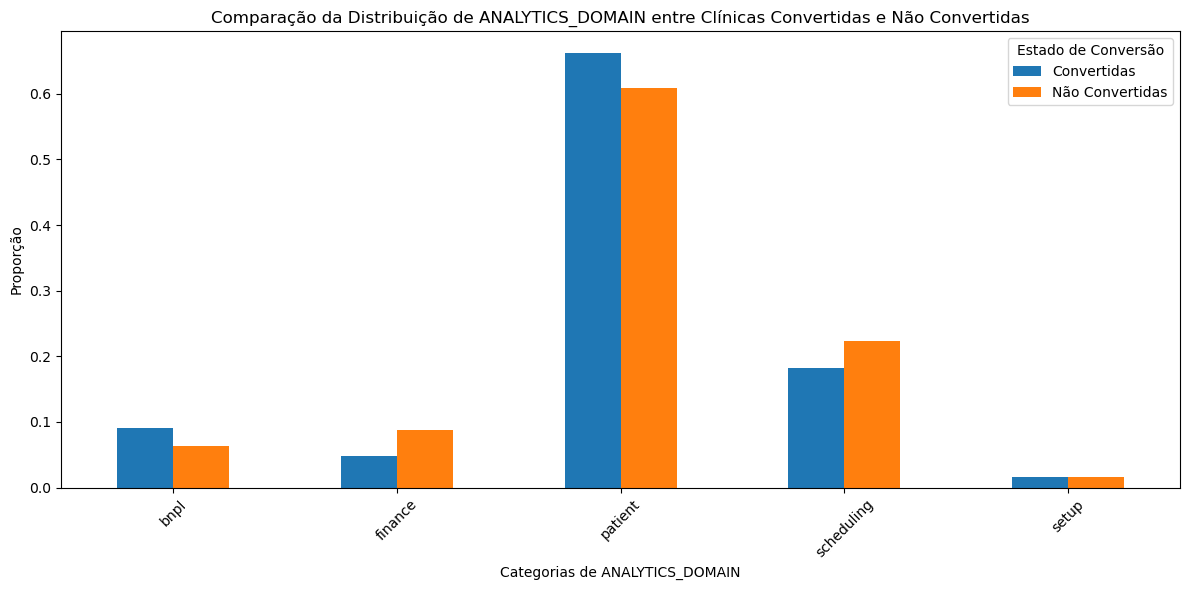

Distribuição de IS_TRANSACTION - Clínicas Convertidas:
IS_TRANSACTION
False    0.993256
True     0.006744
Name: proportion, dtype: float64

Distribuição de IS_TRANSACTION - Clínicas Não Convertidas:
IS_TRANSACTION
False    0.996707
True     0.003293
Name: proportion, dtype: float64


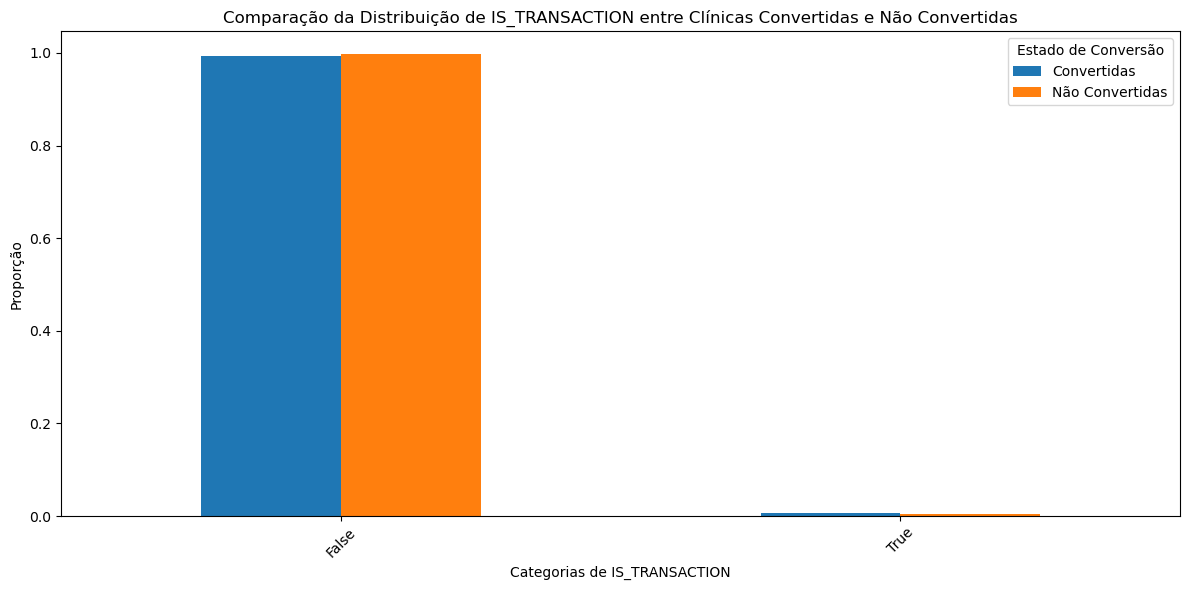

Distribuição de IS_BNPL_ACTIVITY - Clínicas Convertidas:
IS_BNPL_ACTIVITY
False    0.909415
True     0.090585
Name: proportion, dtype: float64

Distribuição de IS_BNPL_ACTIVITY - Clínicas Não Convertidas:
IS_BNPL_ACTIVITY
False    0.936407
True     0.063593
Name: proportion, dtype: float64


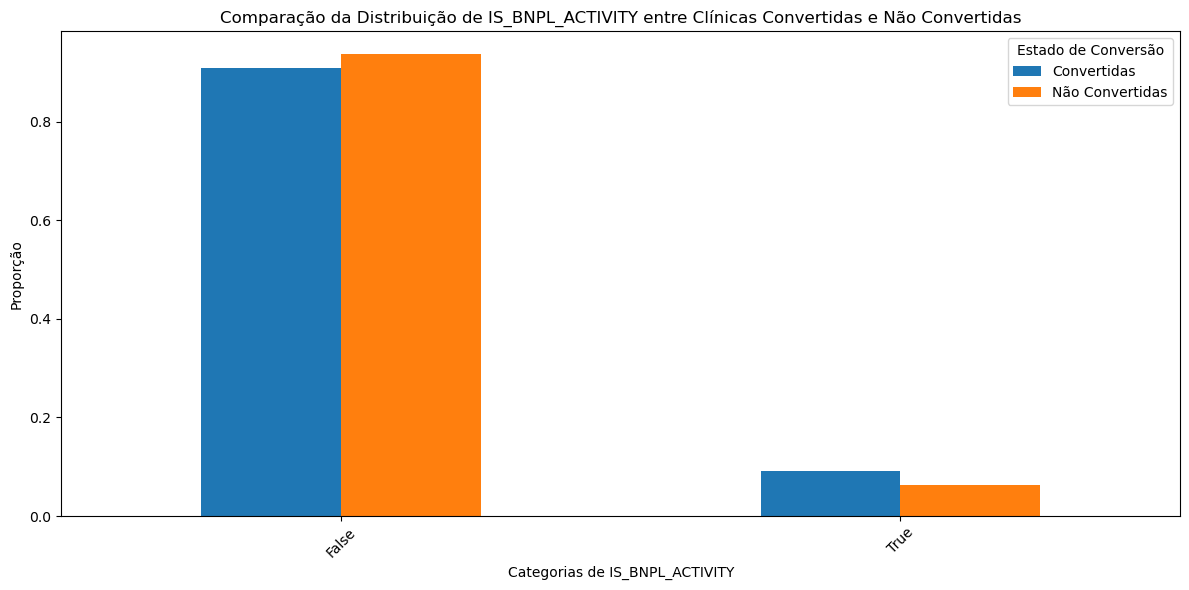

Distribuição de IS_VALID_ACTIVITY - Clínicas Convertidas:
IS_VALID_ACTIVITY
True     0.618619
False    0.381381
Name: proportion, dtype: float64

Distribuição de IS_VALID_ACTIVITY - Clínicas Não Convertidas:
IS_VALID_ACTIVITY
True     0.723811
False    0.276189
Name: proportion, dtype: float64


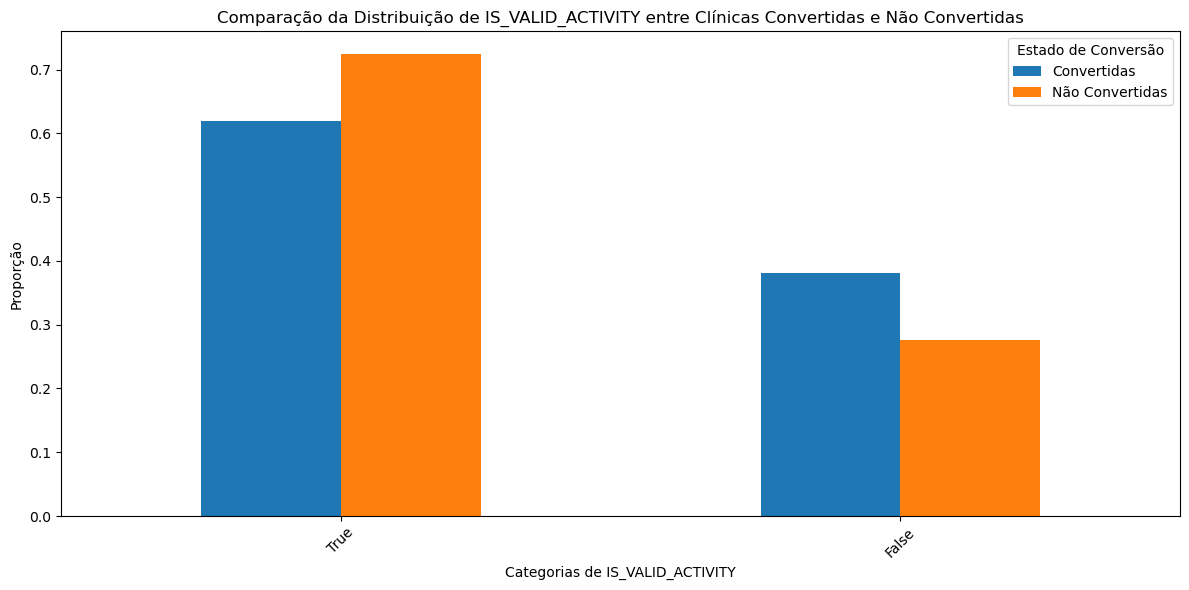

Distribuição de IS_DELETION_ACTIVITY - Clínicas Convertidas:
IS_DELETION_ACTIVITY
False    0.928194
True     0.071806
Name: proportion, dtype: float64

Distribuição de IS_DELETION_ACTIVITY - Clínicas Não Convertidas:
IS_DELETION_ACTIVITY
False    0.938671
True     0.061329
Name: proportion, dtype: float64


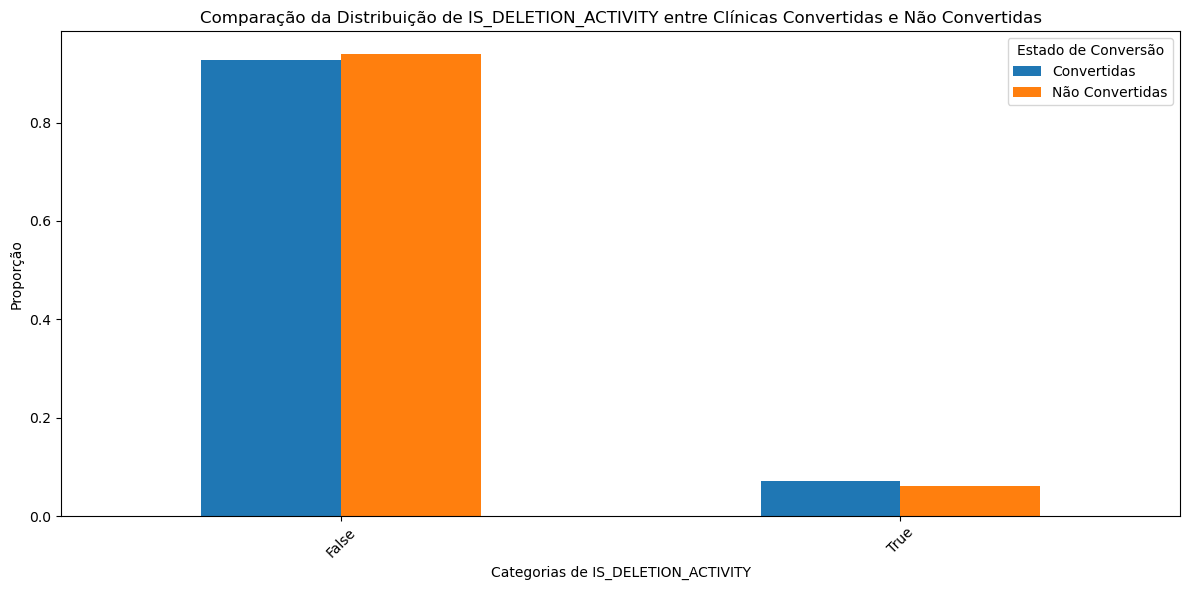

Distribuição de IS_MANAGEMENT_ACTIVITY - Clínicas Convertidas:
IS_MANAGEMENT_ACTIVITY
True     0.903465
False    0.096535
Name: proportion, dtype: float64

Distribuição de IS_MANAGEMENT_ACTIVITY - Clínicas Não Convertidas:
IS_MANAGEMENT_ACTIVITY
True     0.93332
False    0.06668
Name: proportion, dtype: float64


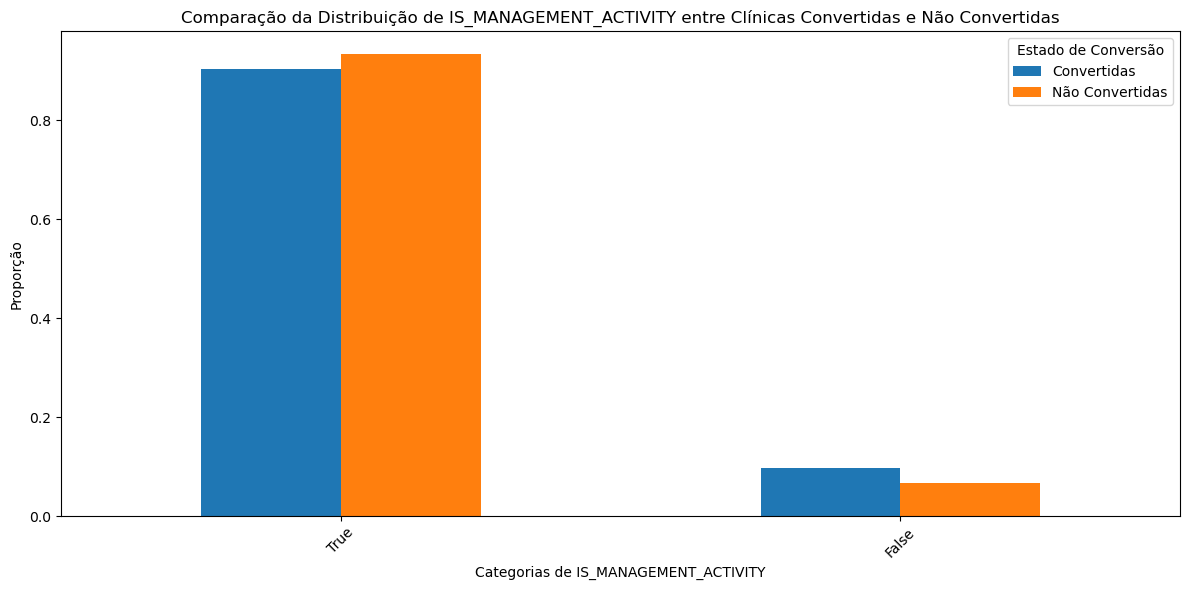

Distribuição de IS_FINANCE_ACTIVITY - Clínicas Convertidas:
IS_FINANCE_ACTIVITY
False    0.887728
True     0.112272
Name: proportion, dtype: float64

Distribuição de IS_FINANCE_ACTIVITY - Clínicas Não Convertidas:
IS_FINANCE_ACTIVITY
False    0.902037
True     0.097963
Name: proportion, dtype: float64


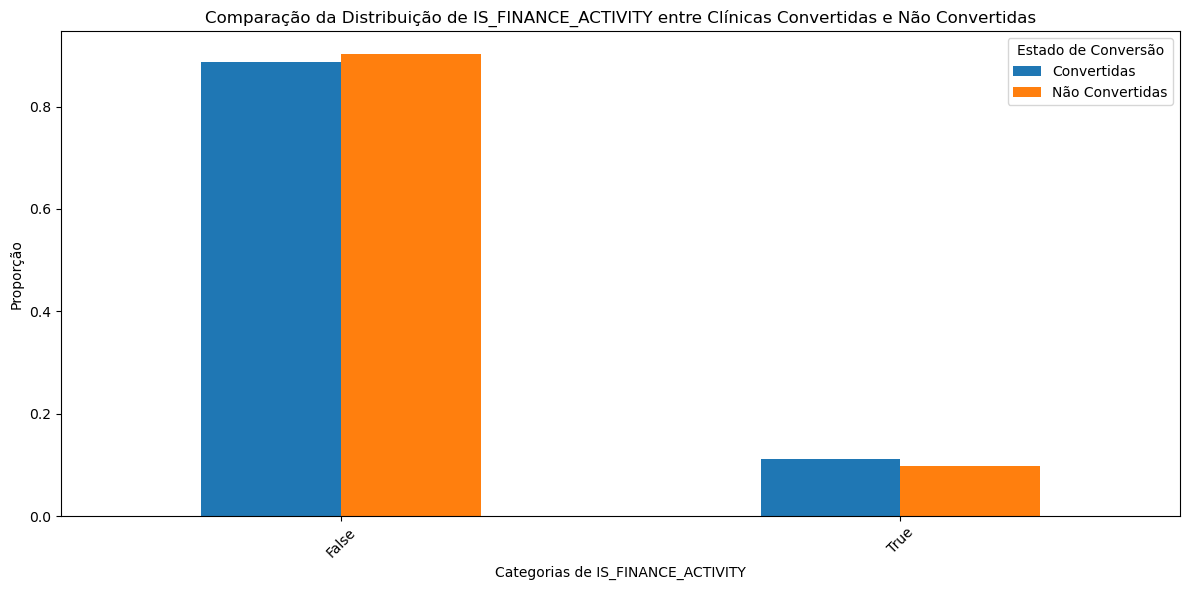

In [45]:
# Função para comparar distribuições entre clínicas convertidas e não convertidas
def compare_categorical_distribution(column_name):
    # Passo 2: Análise descritiva - Distribuição das categorias na coluna especificada
    converted_dist = converted_clinics[column_name].value_counts(normalize=True)
    not_converted_dist = not_converted_clinics[column_name].value_counts(normalize=True)

    # Exibindo a distribuição de categorias
    print(f"Distribuição de {column_name} - Clínicas Convertidas:")
    print(converted_dist)
    print(f"\nDistribuição de {column_name} - Clínicas Não Convertidas:")
    print(not_converted_dist)

    # Combinando as distribuições em um único DataFrame para facilitar a visualização
    comparison_df = pd.DataFrame({
        'Convertidas': converted_dist,
        'Não Convertidas': not_converted_dist
    }).fillna(0)

    # Plotando a comparação
    comparison_df.plot(kind='bar', figsize=(12, 6))
    plt.title(f"Comparação da Distribuição de {column_name} entre Clínicas Convertidas e Não Convertidas")
    plt.xlabel(f"Categorias de {column_name}")
    plt.ylabel("Proporção")
    plt.xticks(rotation=45)
    plt.legend(title="Estado de Conversão")
    plt.tight_layout()
    plt.show()

# Lista de colunas categóricas para análise
categorical_columns = [
    'INTEREST_CATEGORY_SIGNUP',
    'ACTIVITY_TYPE',
    'FEATURE',
    'MODULE',
    'ANALYTICS_DOMAIN',
    'IS_TRANSACTION',
    'IS_BNPL_ACTIVITY',
    'IS_VALID_ACTIVITY',
    'IS_DELETION_ACTIVITY',
    'IS_MANAGEMENT_ACTIVITY',
    'IS_FINANCE_ACTIVITY'
]

# Aplicando a função para cada coluna categórica
for column in categorical_columns:
    compare_categorical_distribution(column)


In [42]:
#sns.scatterplot(data=clinics_filtered, x='DAYS_TO_CONVERT', y='NUMBER_OF_ACTIVITIES')
#plt.title('Dias para Conversão vs Número de Atividades')
#plt.show()

In [46]:
# Selecionar as colunas para análise
final_table = clinics_activity[['CLINIC_ID', 'SUBSCRIPTION_START_DATE', 'CLINIC_CREATED_AT', 'DAYS_TO_CONVERT', 
                                'BUSINESS_SEGMENTATION', 'INTEREST_CATEGORY_SIGNUP', 'ACTIVITY_AT', 'ACTIVITY_TYPE', 
                                'FEATURE', 'MODULE', 'ANALYTICS_DOMAIN', 'IS_TRANSACTION', 'IS_BNPL_ACTIVITY', 
                                'IS_VALID_ACTIVITY', 'IS_DELETION_ACTIVITY', 'IS_MANAGEMENT_ACTIVITY', 
                                'IS_FINANCE_ACTIVITY', 'CONVERTED', 'INTEREST_CATEGORY_SIGNUP']]

# Exibir as primeiras linhas da tabela resultante
print(final_table.head())

# Salvar a tabela resultante em um arquivo CSV
final_table.to_csv('C:\\Users\\cesar\\portjulia\\final_table.csv', index=False)

   CLINIC_ID SUBSCRIPTION_START_DATE       CLINIC_CREATED_AT  DAYS_TO_CONVERT  \
0       8993                     NaT 2023-08-01 06:25:16.121              NaN   
1       8994                     NaT 2023-08-01 06:58:36.251              NaN   
2       8994                     NaT 2023-08-01 06:58:36.251              NaN   
3       8994                     NaT 2023-08-01 06:58:36.251              NaN   
4       8994                     NaT 2023-08-01 06:58:36.251              NaN   

  BUSINESS_SEGMENTATION INTEREST_CATEGORY_SIGNUP              ACTIVITY_AT  \
0          Independente              BNPL e SaaS                      NaN   
1          Independente              BNPL e SaaS  2023-08-01 11:11:58.521   
2          Independente              BNPL e SaaS  2023-08-01 11:12:53.451   
3          Independente              BNPL e SaaS  2023-08-01 11:15:08.884   
4          Independente              BNPL e SaaS  2023-08-01 11:15:30.367   

       ACTIVITY_TYPE             FEATURE    MODULE

In [47]:
# Criando um app Dash
app = dash.Dash(__name__)

# Função para criar gráficos diferentes para convertidas e não convertidas
def generate_comparison_figure(column_name):
    converted_dist = converted_clinics[column_name].value_counts(normalize=True).reset_index()
    not_converted_dist = not_converted_clinics[column_name].value_counts(normalize=True).reset_index()

    # Adicionando a coluna de status de conversão
    converted_dist['Status'] = 'Convertidas'
    not_converted_dist['Status'] = 'Não Convertidas'

    # Renomeando as colunas para mesclar os dois DataFrames
    converted_dist.columns = [column_name, 'Proporção', 'Status']
    not_converted_dist.columns = [column_name, 'Proporção', 'Status']

    # Combinando os DataFrames
    combined_df = pd.concat([converted_dist, not_converted_dist])

    # Criando o gráfico
    fig = px.bar(
        combined_df, 
        x=column_name, 
        y='Proporção', 
        color='Status', 
        barmode='group',
        color_discrete_map={
            'Convertidas': '#636EFA',  # Azul para convertidas
            'Não Convertidas': '#A569BD'  # Vermelho para não convertidas
        },
        title=f"Comparação de {column_name} entre Clínicas Convertidas e Não Convertidas"
    )

    fig.update_layout(
        xaxis_title=f"Categorias de {column_name}",
        yaxis_title="Proporção",
        legend_title="Status de Conversão",
        template="plotly_white"  # Define um fundo branco para melhor visibilidade
    )

    return fig

# Layout do app Dash
app.layout = html.Div([
    html.H1("Relatório Interativo de Conversão de Clínicas"),

    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in categorical_columns],
        value=categorical_columns[0],
        clearable=False
    ),

    dcc.Graph(id='comparison-graph')
])

# Callback para atualizar o gráfico
@app.callback(
    Output('comparison-graph', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_graph(selected_column):
    return generate_comparison_figure(selected_column)

# Rodando o app
if __name__ == '__main__':
    app.run_server(debug=True)